In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [2]:
columns = ['Sepal_Length' , 'Sepal_Width' , 'Petal_Length' , 'Petal_Width' , 'Class']
df = pd.read_csv('/content/bezdekIris.data' , names = columns)
df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.isnull().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Class           0
dtype: int64

In [4]:
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Class'], dtype='object')

In [6]:
print("Target Labels : ")
print(df['Class'].unique())

Target Labels : 
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [7]:
df.nunique()

Sepal_Length    35
Sepal_Width     23
Petal_Length    43
Petal_Width     22
Class            3
dtype: int64

In [8]:
df.Class.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

In [9]:
df.Class.nunique()

3

In [10]:
df.corr()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.000000,-0.117570,0.871754,0.817941
Sepal_Width,-0.117570,1.000000,-0.428440,-0.366126
Petal_Length,0.871754,-0.428440,1.000000,0.962865
Petal_Width,0.817941,-0.366126,0.962865,1.000000


**VISUALISATION**




In [11]:
fig = px.scatter(df , x = 'Sepal_Width' , y = 'Sepal_Length' , color = 'Class')
fig.show()

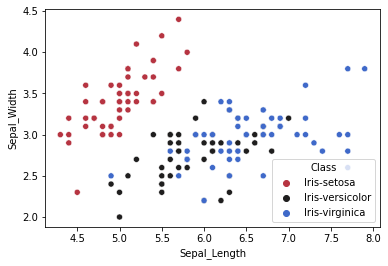

In [12]:
ax = sns.scatterplot(x = df['Sepal_Length'] , y = df['Sepal_Width'] , hue = df['Class'] , palette = 'icefire_r' , legend = 'auto')

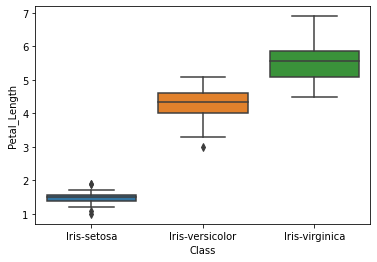

In [13]:
sns.boxplot(x ='Class' , y = 'Petal_Length' , data = df)
plt.show()

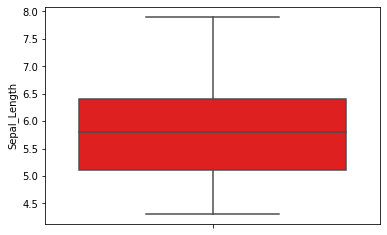

In [14]:
sns.boxplot(y = 'Sepal_Length' , data = df , color = 'Red')
plt.show()

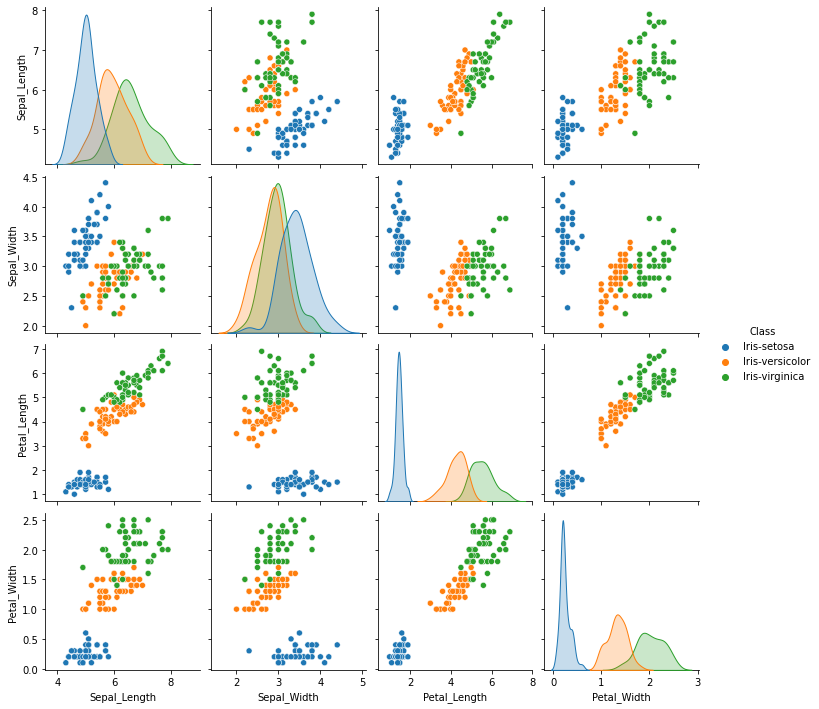

In [15]:
sns.pairplot(df , hue = 'Class' )

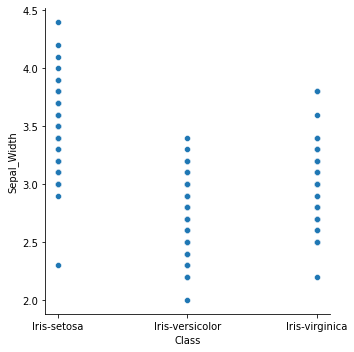

In [16]:
sns.relplot(x = 'Class' , y = 'Sepal_Width' , data = df )
plt.show()

Data Pre-Processing or Correlation Matrix

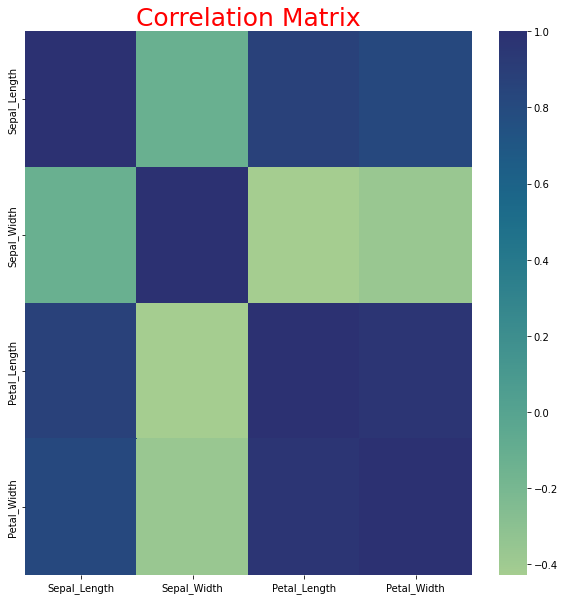

In [17]:
plt.figure(figsize = (10,10))
fig = sns.heatmap(df.corr() , cmap = 'crest')
fig.set_title('Correlation Matrix' , size = 25 , color = 'Red')
plt.show()

**CLASSIFICATION & PREDICTION USONG KNN MODEL**

In [18]:
x = df.drop("Class", axis=1)
y = df["Class"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
x_new = np.array([[5 , 2.9 , 1 , 0.2]])
prediction = knn.predict(x_new)
print("Prediciton : {}".format(prediction))

Prediciton : ['Iris-setosa']


**LABEL ENCODER**

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
df['Class'] = le.fit_transform(df['Class'])
df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [22]:
X = df.drop(columns = 'Class')
y = df['Class']
X.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**SPLITTING THE DATASET INTO TRAINING AND TEST SETS**

In [23]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size = 0.2)

**SELECTING MACHINE LEARNING MODELS**

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [25]:
lr = LogisticRegression()
svm = SVC()
nb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

**TRAINING & EVALUATING MODELS**

In [26]:
models = [ lr , svm , nb , dt , rf ]
scores = []
for i in models:
    i.fit(X_train , y_train)
    y_pred = i.predict(X_test)
    scores.append(accuracy_score(y_test , y_pred))
    print("Accuracy of "+ type(i).__name__ +" is ",accuracy_score(y_test , y_pred))

Accuracy of LogisticRegression is  0.9666666666666667
Accuracy of SVC is  0.9333333333333333
Accuracy of GaussianNB is  0.9666666666666667
Accuracy of DecisionTreeClassifier is  0.9333333333333333
Accuracy of RandomForestClassifier is  0.9666666666666667


**ACCURACY OF EACH MODEL**

In [27]:
results  = pd.DataFrame({
    'Models' : [' Logistic Regression' , 'Support Vector Machine' , 'Naive Bayes' , 'Decision Tree' ,
    'Random Forest'] , 'Accuracy' : scores})
results = results.sort_values(by = 'Accuracy' , ascending = False)
print(results)

                   Models  Accuracy
0     Logistic Regression  0.966667
2             Naive Bayes  0.966667
4           Random Forest  0.966667
1  Support Vector Machine  0.933333
3           Decision Tree  0.933333
